# IMDb Dataset Analysis

Downloaded dataset from Kaggle.com<br> 

<b>Problem Statement:</b><br>
My manager asked me, 'I am planning to invest in a new film. Give me a report that will help me in taking decisions on what kind of movies should I invest in so that I have the maximum profit'.capitalize

In [169]:
# importing warnings
import warnings

# filtering all the warnings 
warnings.filterwarnings("ignore")

In [170]:
#impoting all required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [171]:
#Reading IMDb csv file
movies = pd.read_csv('IMDb movies.csv')

#looking at all the column 
pd.set_option('display.max_columns',70)

Analysing the data based on below factors:<br>
Volume <br>
Shape <br>
Feature types <br>
Feature statistics <br>
Missing values <br>

In [172]:
#  Displaying first 2 rows of dataset movies
movies.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [173]:
# Finding out total rows and column
movies.shape

(85855, 22)

In [174]:
#finding all the columns
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [175]:
# Dispay information about all rows and column present in dataset
movies.info

<bound method DataFrame.info of       imdb_title_id                           title  \
0         tt0000009                      Miss Jerry   
1         tt0000574     The Story of the Kelly Gang   
2         tt0001892                  Den sorte drøm   
3         tt0002101                       Cleopatra   
4         tt0002130                       L'Inferno   
...             ...                             ...   
85850     tt9908390                         Le lion   
85851     tt9911196  De Beentjes van Sint-Hildegard   
85852     tt9911774       Padmavyuhathile Abhimanyu   
85853     tt9914286               Sokagin Çocuklari   
85854     tt9914942      La vida sense la Sara Amat   

                       original_title  year date_published  \
0                          Miss Jerry  1894     1894-10-09   
1         The Story of the Kelly Gang  1906     1906-12-26   
2                      Den sorte drøm  1911     1911-08-19   
3                           Cleopatra  1912     1912-11-13 

In [176]:
#Describe gives information about all the columns important values.
movies.describe(include = 'all')

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,85855,85855,85855,85855,85855,85855,85855.000000,85791,85022,85768,84283,81400,85786,83740,85855.000000,8.585500e+04,23710,15326,31016,13305.000000,78258.000000,74058.000000
unique,85855,82094,80852,168,22012,1257,NaN,4907,4377,34733,66859,32050,85729,83611,NaN,NaN,4642,14857,30414,NaN,NaN,NaN
top,tt0408120,Anna,Anna,2017,2010,Drama,NaN,USA,English,Jesús Franco,Jing Wong,Metro-Goldwyn-Mayer (MGM),"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Ka...",The story of,NaN,NaN,$ 1000000,$ 1000000,$ 8144,NaN,NaN,NaN
freq,1,10,10,3223,113,12543,NaN,28511,35939,87,84,1284,9,15,NaN,NaN,758,19,15,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,100.351418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.898656,9.493490e+03,NaN,NaN,NaN,55.896881,46.040826,27.479989
std,NaN,NaN,NaN,NaN,NaN,NaN,22.553848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.234987,5.357436e+04,NaN,NaN,NaN,17.784874,178.511411,58.339158
min,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,9.900000e+01,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.200000,2.050000e+02,NaN,NaN,NaN,43.000000,4.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,96.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.100000,4.840000e+02,NaN,NaN,NaN,57.000000,9.000000,8.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,108.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.800000,1.766500e+03,NaN,NaN,NaN,69.000000,27.000000,23.000000


<b>Analysing the data based on below factors:</b><br>
<b>Volume</b> - Dataset have Good volumn. <br> 
<b>Shape</b>  - Dataset contain 85855 rows and 22 columns.<br>
<b>Feature types</b> - Features contains differant data types and all records are unique as per IMDb_title_id.I can see the data is not clean. Data hava many NaN values and Budget fields have $,INR infront of amount field. <br> 
<b>Feature statistics</b> - We will discove this later during our analysis.<br> 
<b>Missing values</b> - There are many values missing present as I can see it has many NaN fields.<br> 

<b> Clean the data and make dataset ready for Analysis <b>

In [177]:
# Drop extra rows and keep only 2000 rows for your analysis

#movies.drop(movies.index[2000:85855],0,inplace = True)

In [178]:
#Finding out total rows and column after deletion is performed

movies.shape

(85855, 22)

In [179]:
# To find out data types of all the rows
movies['budget'].apply(type).value_counts()

<class 'float'>    62145
<class 'str'>      23710
Name: budget, dtype: int64

In [180]:
movies['budget'].head()

0        NaN
1     $ 2250
2        NaN
3    $ 45000
4        NaN
Name: budget, dtype: object

In [181]:
# replacing initial currency values from budget column ex. $ 1000, Replaced $ with spaces
movies['budget'] = movies['budget'].replace({'\$': '', ',': '','^[A-Z]+': ''}, regex=True).astype(float)


In [182]:
movies['budget'].head()

0        NaN
1     2250.0
2        NaN
3    45000.0
4        NaN
Name: budget, dtype: float64

In [183]:
# replacing initial currency values from usa_gross_income column ex. $ 1000, Replaced $ with spaces
movies['usa_gross_income'] = movies['usa_gross_income'].replace({'\$': '', ',': '','^[A-Z]+': ''}, regex=True).astype(float)

In [184]:
movies['usa_gross_income'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: usa_gross_income, dtype: float64

In [185]:
# replacing initial currency values from usa_gross_income column ex. $ 1000, Replaced $ with spaces
movies['worlwide_gross_income'] = movies['worlwide_gross_income'].replace({'\$': '', ',': '','^[A-Z]+': ''}, regex=True).astype(float)

In [186]:
#movies['budget']=movies['budget'].apply(pd.to_numeric,errors='coerce')
#movies['budget'].tail()
movies.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

By looking at above null count, it is clearly visible that dataset has lots of null value and column metascore contain max null value.<br>
let's delete all the rows which has null values so that we can perform Analysis esily.

In [187]:
# Check all the values of budget to verify initial currecy values removed properly or not and to check which type of 
#values are present in budget column
print(set(movies['budget']))

{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2.0, 10.0, 12.0, 19.0, 20.0, 4.0, 18.0, 15.0, 17.0, 25.0, 5.0, 30.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 40.0, 7.0, nan, 44.0, 45.0, nan, nan, nan, nan, 50.0, nan, nan, nan, 54.0, nan, nan, nan, nan, nan, 60.0, nan, 11.0, 65.0, 67.0, 70.0, 3.0, 83.0, 90.0, 100.0, 105.0, 120.0, 655500.0, 150.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 230.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 250.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2883848.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 300.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 350.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [188]:
# drop all rows which contain null values

movies.dropna(inplace=True)
#movies['worlwide_gross_income']=movies['worlwide_gross_income'].dropna(inplace=True)
#movies['usa_gross_income']=movies['usa_gross_income'].dropna(inplace=True)
movies['budget'].tail()

85266     3000000.0
85274    10000000.0
85397     5000000.0
85460    11100000.0
85740    12000000.0
Name: budget, dtype: float64

In [189]:
# replacing initial currency value from worlwide_gross_income column ex. $ 1000, Replaced $ with spaces
movies['worlwide_gross_income'].head(5)

506       1349711.0
1048        46008.0
2454       457688.0
2795       155895.0
2827    184925486.0
Name: worlwide_gross_income, dtype: float64

In [190]:
#divide 1000000 from budget,usa_gross_income and worlwide_gross_income to convert '$' to 'million $' 

movies['budget']=movies['budget']/1000000
movies['usa_gross_income'] = movies['usa_gross_income']/1000000
movies['worlwide_gross_income'] = movies['worlwide_gross_income']/1000000

movies['budget'].head(15)

506      6.000000
1048     1.500000
2454     1.500000
2795     0.060000
2827     1.499000
3266     3.977000
3348     1.900000
3451     2.777000
3553     2.280000
3672     2.600000
3816     0.839727
4126     0.950000
4334    48.000000
4733     2.100000
6026     3.000000
Name: budget, dtype: float64

Now As per the problem First thing I have to do is to break my problem in parts and think straight, <br>
First, let me see how these different movies performed in terms of ROI and then who are the top performers. For that I would be needing these basic information:<br>
Movie attributes<br>
The budget of the movie<br>
Profit earned by the movie<br>

In [191]:
#Create a new column Profit by separating gross income from budget
movies.insert(4,column='Profit',value=movies['usa_gross_income']- movies['budget'])

In [192]:
#Sort values of profit by ignoring indexs
movies.sort_values(by=['Profit'],ascending = True, inplace= True, ignore_index=True)

In [193]:
movies.head(3)

,imdb_title_id,title,original_title,year,Profit,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt1606384,Mai wei,Mai wei,2011,-29999.929823,2011-12-22,"Action, Drama, War",137,South Korea,"Korean, Japanese, Mandarin, Russian, German, E...",Je-kyu Kang,"Je-kyu Kang, Justin Byung-in Kim",Directors,"Dong-Gun Jang, Joe Odagiri, Bingbing Fan, In-k...","In World War II-era Korea, rival runners, one ...",7.7,10375,30000.0,0.070177,16.653488,30.0,74.0,62.0
1,tt0091605,Il nome della rosa,Der Name der Rose,1986,-29992.846513,1986-10-17,"Crime, Drama, Mystery",130,"West Germany, Italy, France","English, Latin, Italian",Jean-Jacques Annaud,"Umberto Eco, Andrew Birkin",Constantin Film,"Sean Connery, Christian Slater, Helmut Qualtin...",An intellectually nonconformist friar investig...,7.7,99379,30000.0,7.153487,7.153487,54.0,177.0,78.0
2,tt8290698,Gongjak,Gongjak,2018,-18999.499197,2018-08-08,"Drama, Thriller",137,South Korea,"Korean, Mandarin, Japanese",Jong-bin Yoon,"Sung-hui Kwon, Myeong-chan Park",CJ E&M Film Financing & Investment Entertainme...,"Jung-min Hwang, Sung-min Lee, Jin-woong Cho, J...","In the mid-1990s, a loyal South Korean secret ...",7.2,3182,19000.0,0.500803,38.844509,69.0,19.0,39.0


In [194]:
top_10 = movies.loc[0:9, 'title']
top_10

0                                   Mai wei
1                        Il nome della rosa
2                                   Gongjak
3                                  The Host
4                              Mademoiselle
5                            Train to Busan
6      Lupin III: Il castello di Cagliostro
7    La storia della principessa splendente
8                             Lady Vendetta
9                             Senza destino
Name: title, dtype: object

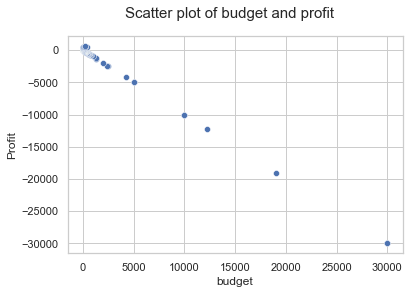

In [195]:
sns.set_style("whitegrid")
map=sns.scatterplot(x=movies['budget'],y=movies['Profit'],data=movies)
plt.suptitle("Scatter plot of budget and profit",fontsize =15)
plt.show()

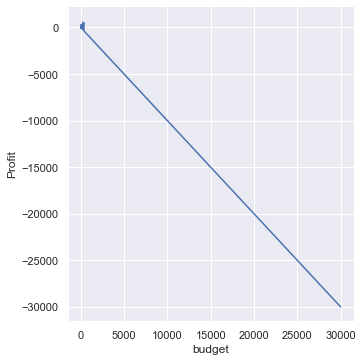

In [196]:
# Apply the default theme
sns.set_theme()

sns.relplot(data=movies, kind="line",x=movies["budget"], y=movies["Profit"],facet_kws=dict(sharex=False))

After looking at above 2 the graph, I see almost all the points are either with 0 profit or in negative profit.
Let's analysis data more and craete a data which is going to help to analys better.

In [203]:
#Created new dataframe to where profit is grater than 1.Because anyway we are looking for movies which has good revenue
positive_profit = movies[movies["Profit"] =>1].head(100)
positive_profit.head(2)

SyntaxError: invalid syntax (<ipython-input-203-076e7db0e04b>, line 2)

In [209]:
# Chcking all the different genre count which has positive profit
positive_profit['genre'].value_counts()

Comedy, Drama                   7
Comedy, Drama, Romance          7
Comedy                          7
Comedy, Romance                 6
Drama                           5
Drama, Romance                  5
Crime, Drama, Thriller          4
Action, Crime, Drama            3
Horror                          3
Drama, Music                    2
Horror, Thriller                2
Drama, Fantasy, Romance         2
Drama, Horror, Mystery          2
Comedy, Crime, Drama            2
Animation, Action, Adventure    1
Action, Adventure, Drama        1
Comedy, Fantasy, Horror         1
Biography, Drama, Fantasy       1
Action, Adventure, Crime        1
Crime, Drama, Film-Noir         1
Drama, Thriller, War            1
Drama, Sci-Fi, Thriller         1
Adventure, Comedy, Sci-Fi       1
Adventure, Crime, Drama         1
Crime, Drama, Mystery           1
Animation, Biography, Crime     1
Action, Drama, Thriller         1
Biography, Drama, Romance       1
Crime, Drama, History           1
Action, Biogra

Above details give insights that how "Comedy, Drama" ,"Comedy, Drama, Romance" "Comedy" has more in count with positive profit, it means most watched and liked genre.

In [210]:
#Chcking all the different genre count which has positive profit
positive_profit['production_company'].value_counts()

Warner Bros.                 5
Paramount Pictures           4
Miramax                      2
Fox Searchlight Pictures     2
Dimension Films              2
                            ..
Element Pictures             1
Python (Monty) Pictures      1
Castle Rock Entertainment    1
Cinetic Media                1
Sailor Bear                  1
Name: production_company, Length: 90, dtype: int64

Production Company details shows the movies which is under production like "Warner Bros" or "Paramount Pictures", has more count on profit.

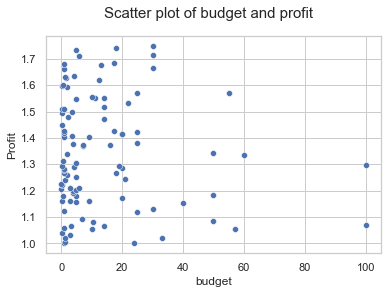

In [211]:
# Plot the graph budget and positive profit
sns.set_style("whitegrid")
map=sns.scatterplot(x=positive_profit['budget'],y=positive_profit['Profit'],data=movies)
plt.suptitle("Scatter plot of budget and profit",fontsize =15)
plt.show()

We can some movies with low medium budget between 0 to 20 has given all kind of profit.
movies with high budget doesn't seem have got good profit.

In [212]:
positive_profit['budget'].sort_values()
#positive_profit.sort_values(by=['Profit'],ascending = True, inplace= True, ignore_index=True)

3777      0.023
3781      0.046
3817      0.100
3780      0.100
3819      0.125
         ...   
3827     55.000
3754     57.000
3797     60.000
3758    100.000
3794    100.000
Name: budget, Length: 100, dtype: float64

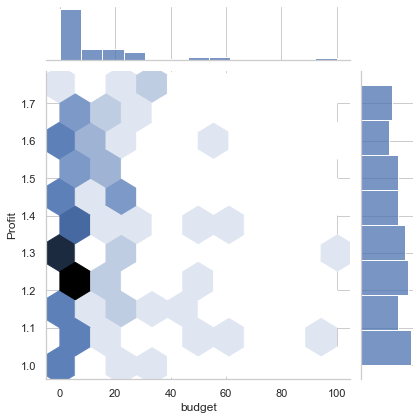

In [213]:
sns.jointplot(x = "budget", y = "Profit", 
              kind = "hex", data = positive_profit)
    
plt.show()

In [214]:
#Created new dataframe to where profit is grater than 1.Because anyway we are looking for movies which has good revenue
Negative_profit = movies[movies["Profit"] <1].head(100)
Negative_profit.head(2)

,imdb_title_id,title,original_title,year,Profit,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt1606384,Mai wei,Mai wei,2011,-29999.929823,2011-12-22,"Action, Drama, War",137,South Korea,"Korean, Japanese, Mandarin, Russian, German, E...",Je-kyu Kang,"Je-kyu Kang, Justin Byung-in Kim",Directors,"Dong-Gun Jang, Joe Odagiri, Bingbing Fan, In-k...","In World War II-era Korea, rival runners, one ...",7.7,10375,30000.0,0.070177,16.653488,30.0,74.0,62.0
1,tt0091605,Il nome della rosa,Der Name der Rose,1986,-29992.846513,1986-10-17,"Crime, Drama, Mystery",130,"West Germany, Italy, France","English, Latin, Italian",Jean-Jacques Annaud,"Umberto Eco, Andrew Birkin",Constantin Film,"Sean Connery, Christian Slater, Helmut Qualtin...",An intellectually nonconformist friar investig...,7.7,99379,30000.0,7.153487,7.153487,54.0,177.0,78.0


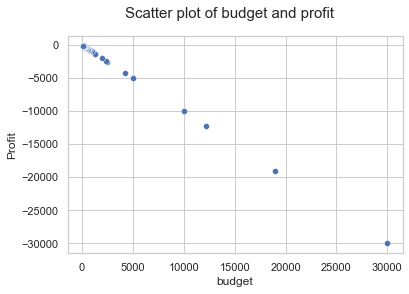

In [215]:
# Plot the graph budget and positive profit
sns.set_style("whitegrid")
map=sns.scatterplot(x=Negative_profit['budget'],y=Negative_profit['Profit'],data=movies)
plt.suptitle("Scatter plot of budget and profit",fontsize =15)
plt.show()

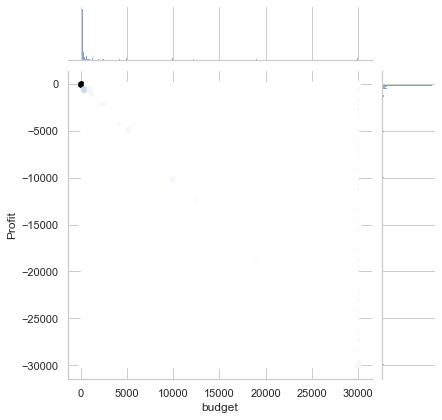

In [217]:
sns.jointplot(x = "budget", y = "Profit", 
              kind = "hex", data = Negative_profit)
    
plt.show()